## Importing Libraries

In [9]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import *

#PANDAS
import pandas as pd
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 100)
import numpy as np

#STATSMODEL
import statsmodels.api as sm

#SEABORN
import seaborn as sns #library especializada em visualização de data estatísticos e baseada em matplotlib().

#SCIPY
import scipy.stats as stats
from scipy.stats import normaltest #A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Bibliotecas opcionais


In [11]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

In [12]:
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <font color='red' style='font-size: 30px;'> ÁNALISE DE REGRESSÃO </font>
<hr style='border: 2px solid red;'>

## **Tabela para análise**

In [13]:
URL = 'https://github.com/paolaosouza/blood_preassure_analysis/raw/main/dados_dobrados.csv'
data = pd.read_csv(URL)
data.head()

,ID,Age,BMI,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
0,2,20,20.7,f,28.83,25.33,22.33,18.32,0.449823,57.33,100.67
1,4,20,19.8,f,34.13,22.40,24.00,14.86,0.545678,58.67,98.33
2,6,19,25.2,f,29.43,28.87,37.33,17.14,0.554795,64.33,101.33
3,7,22,20.1,f,31.03,25.53,19.00,19.57,0.396578,69.00,107.33
4,8,29,25.2,f,32.60,26.63,22.00,19.73,0.422369,67.67,109.00


In [14]:
data_be = pd.read_csv('https://github.com/paolaosouza/blood_preassure_analysis/raw/main/dados_be.csv')
data_bd = pd.read_csv('https://github.com/paolaosouza/blood_preassure_analysis/raw/main/dados_bd.csv')

In [15]:
data_be.head()
data_bd.head()

,ID,Age,BMI,Sex,Length RA,Circumference RA,Triceps_Skinfold RA,Muscular Circumference RA,Fat_Index RA,DBP RA,SBP RA
0,2,20,20.7,f,28.83,25.33,22.33,18.32,0.449823,57.33,100.67
1,4,20,19.8,f,34.13,22.40,24.00,14.86,0.545678,58.67,98.33
2,6,19,25.2,f,29.43,28.87,37.33,17.14,0.554795,64.33,101.33
3,7,22,20.1,f,31.03,25.53,19.00,19.57,0.396578,69.00,107.33
4,8,29,25.2,f,32.60,26.63,22.00,19.73,0.422369,67.67,109.00


In [16]:
data_bd.columns

Index(['ID', 'Age', 'BMI', 'Sex', 'Length RA', 'Circumference RA',
       'Triceps_Skinfold RA', ' Muscular Circumference RA', ' Fat_Index RA',
       'DBP RA', 'SBP RA'],
      dtype='object')

In [17]:
data_bd.columns

Index(['ID', 'Age', 'BMI', 'Sex', 'Length RA', 'Circumference RA',
       'Triceps_Skinfold RA', ' Muscular Circumference RA', ' Fat_Index RA',
       'DBP RA', 'SBP RA'],
      dtype='object')

In [21]:
data_bd['arm'] = 'right'
data_be['arm'] = 'left'

data_bd.columns = ["id", "Age", "BMI",'Sex', 'Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index','DBP', 'SBP', 'arm']
data_be.columns = ['id', "Age", "BMI",'Sex', 'Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index','DBP', 'SBP', 'arm']

data_be['SBP_ob'] = data_bd['SBP']
data_bd['SBP_ob'] = data_be['SBP']

data_dobrados = pd.concat([data_bd, data_be]).sort_values("id")
data_dobrados.index = list(range(1,data_dobrados.shape[0]+1))
data_dobrados.to_parquet("data_dobrados_r.parquet")

In [22]:
data.head()

,ID,Age,BMI,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
0,2,20,20.7,f,28.83,25.33,22.33,18.32,0.449823,57.33,100.67
1,4,20,19.8,f,34.13,22.40,24.00,14.86,0.545678,58.67,98.33
2,6,19,25.2,f,29.43,28.87,37.33,17.14,0.554795,64.33,101.33
3,7,22,20.1,f,31.03,25.53,19.00,19.57,0.396578,69.00,107.33
4,8,29,25.2,f,32.60,26.63,22.00,19.73,0.422369,67.67,109.00


## **Correlação**

### Circunferencia Muscular

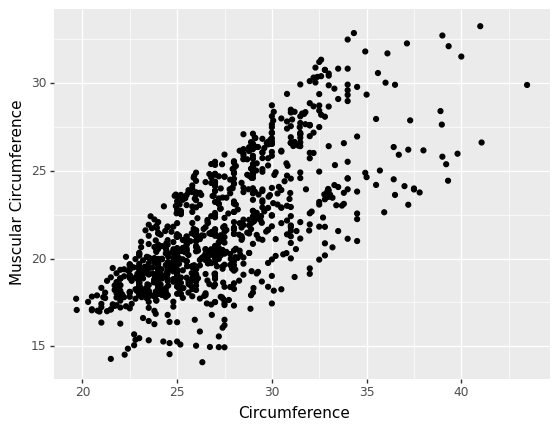

<ggplot: (8757949149293)>

In [23]:
(
    ggplot(data_dobrados, aes(x='Circumference', y='Muscular Circumference')) + 
    geom_point()
)

### Triceps

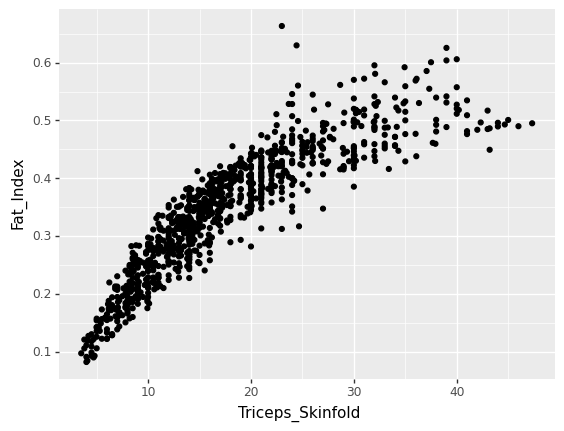

<ggplot: (8757949031449)>

In [24]:
(
    ggplot(data_dobrados, aes(x='Triceps_Skinfold', y='Fat_Index')) + 
    geom_point()
)

### Sexo

In [25]:
data_dobrados['arm_num'] = np.where(data_dobrados['arm'] == 'right', 1, 0)
data_dobrados['Sex_num'] = np.where(data_dobrados['Sex'] == 'f', 1, 0)

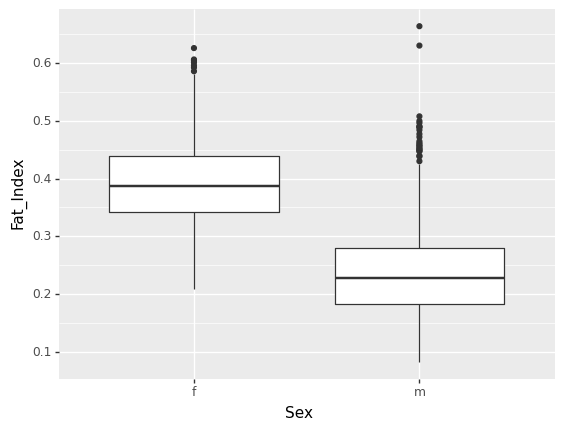

<ggplot: (8757947409637)>

In [26]:
(
    ggplot(data_dobrados, aes(x='Sex', y='Fat_Index')) + 
    geom_boxplot()
)

In [27]:
data_dobrados['Sex_num'].mean()

0.689161554192229

In [28]:
from scipy.stats import pointbiserialr as bcorr

bcorr(data_dobrados.query("arm_num == 1")['Sex_num'], data_dobrados.query("arm_num == 1")['Fat_Index'])

PointbiserialrResult(correlation=0.644900931350791, pvalue=7.715440340694018e-59)

In [29]:
bcorr(data_dobrados.query("arm_num == 0")['Sex_num'], data_dobrados.query("arm_num == 0")['Fat_Index'])

PointbiserialrResult(correlation=0.6530191430074997, pvalue=9.055193369947103e-61)

Dado a valor alto da correlacao bisserial e na diferenca da distribuicao do indice gorduro e sexo, temos indicios de associacao razoavel entre as duas variaveis. Logo, adicioar ambas no modelo pode ser problematico, pois pode acarretar em multicolinearidade, indo vai contra o pressuposto do modelo linear de independencia entre as covariaveis. Como temos mais interesse em avaliar o indice de gordura, removemos o sexo do modelo. Ajustando um modelo de regressao linear para o indice de gordura sendo explicado pelo sexo, temos que o coeficiente e significativo (reportar valor do beta e o p-valor)

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
mod_e = smf.ols(formula='Fat_Index ~  Sex', 
                data=data_dobrados.query("arm_num == 0"))

mod_d = smf.ols(formula='Fat_Index ~  Sex', 
                data=data_dobrados.query("arm_num == 1"))

fitted_e = mod_e.fit()
fitted_d = mod_d.fit()

In [32]:
print(fitted_e.summary())

                            OLS Regression Results                            
Dep. Variable:              Fat_Index   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     362.1
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           9.06e-61
Time:                        11:01:33   Log-Likelihood:                 531.98
No. Observations:                 489   AIC:                            -1060.
Df Residuals:                     487   BIC:                            -1052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3842      0.004     86.333      0.0

In [33]:
print(fitted_d.summary())

                            OLS Regression Results                            
Dep. Variable:              Fat_Index   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     346.8
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           7.72e-59
Time:                        11:01:33   Log-Likelihood:                 544.06
No. Observations:                 489   AIC:                            -1084.
Df Residuals:                     487   BIC:                            -1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4026      0.004     92.728      0.0

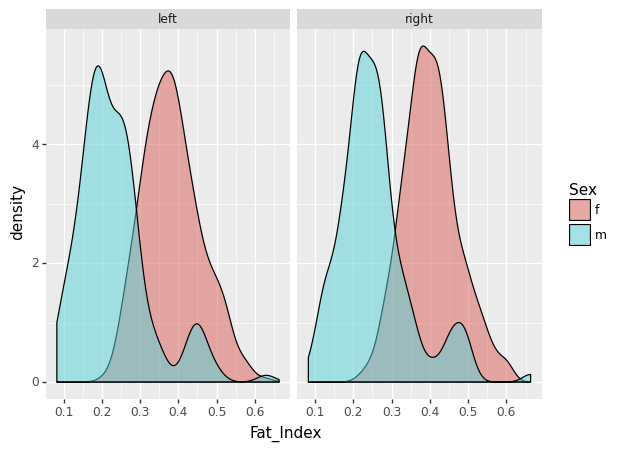

<ggplot: (8757949055597)>

In [34]:
(
    ggplot(data_dobrados, aes(fill='Sex', x='Fat_Index')) + 
    geom_density(alpha=0.5) + 
    facet_grid(". ~ arm")
    
)

In [35]:
data_melt = data_dobrados[['DBP', 'SBP', 'arm']].melt(id_vars='arm')
data_melt['variable'] = pd.Categorical(data_melt['variable'], categories=['SBP', 'DBP'])


In [36]:
g = (
    ggplot(data_melt, aes(x='value', fill='arm')) + geom_density(alpha=0.5) + facet_grid(". ~ variable") + labs(x = "mmHg")
)
g.save(filename="figure1.png", dpi=400)

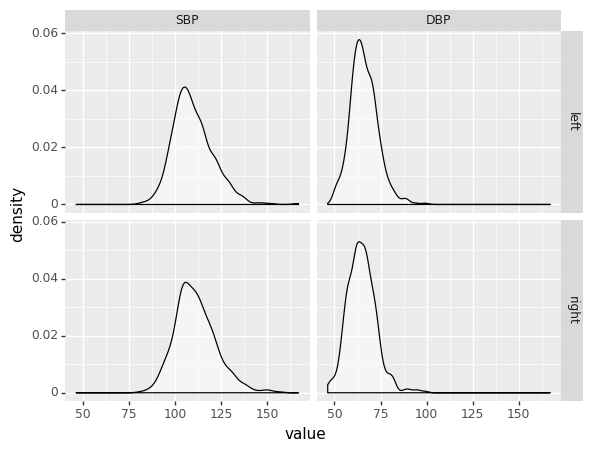

<ggplot: (8757944526313)>

In [37]:
(
    ggplot(data_melt, aes(x='value')) + 
    geom_density(alpha=0.5, fill='white') + 
    #geom_histogram(fill='white') + 
    facet_grid("arm ~ variable")
)

In [38]:
bcorr(data_dobrados.query("arm_num == 1")['Sex_num'], data_dobrados.query("arm_num == 1")['SBP'])

PointbiserialrResult(correlation=-0.5631846235600052, pvalue=2.8804155588422584e-42)

In [39]:
bcorr(data_dobrados.query("arm_num == 0")['Sex_num'], data_dobrados.query("arm_num == 0")['SBP'])

PointbiserialrResult(correlation=-0.571652765665168, pvalue=8.998287582003436e-44)

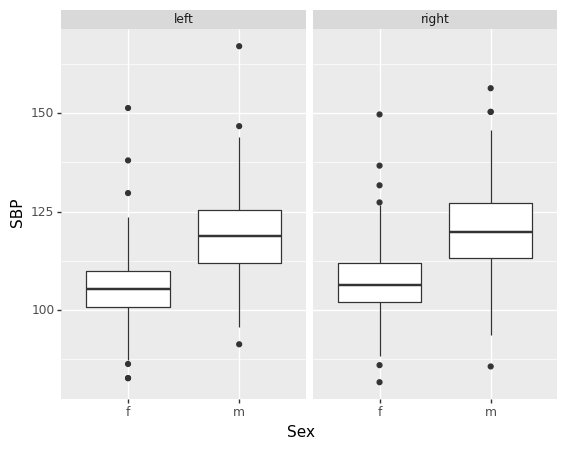

<ggplot: (8757944398469)>

In [40]:
(
    ggplot(data_dobrados, aes(x='Sex', y='SBP')) + 
    geom_boxplot() + 
    facet_grid(". ~ arm")
)

## <font color='red' style='font-size: 22px;'> Modelo de Regressão Linear (BMI, AGE E SEX) </font>
<hr style='border: 2px solid red;'>

In [41]:
data_dobrados.corr()["BMI"].round(4)

id                       -0.0106
Age                       0.0959
BMI                       1.0000
Length                    0.1012
Circumference             0.8771
Triceps_Skinfold          0.5822
Muscular Circumference    0.4986
Fat_Index                 0.2305
DBP                       0.2393
SBP                       0.2723
SBP_ob                    0.2723
arm_num                   0.0000
Sex_num                  -0.1757
Name: BMI, dtype: float64

In [42]:
mod_e = smf.ols(formula='SBP ~  Circumference + Fat_Index + Length + Sex + BMI + Age', 
                data=data_dobrados.query("arm_num == 0"))

mod_d = smf.ols(formula='SBP ~  Circumference + Fat_Index + Length + Sex + BMI + Age', 
                data=data_dobrados.query("arm_num == 1"))

fitted_e = mod_e.fit()
fitted_d = mod_d.fit()

In [43]:
print(fitted_e.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     50.68
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.88e-48
Time:                        11:01:37   Log-Likelihood:                -1742.7
No. Observations:                 489   AIC:                             3499.
Df Residuals:                     482   BIC:                             3529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        72.2475      7.600      9.506

In [44]:
print(fitted_d.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     44.35
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.67e-43
Time:                        11:01:37   Log-Likelihood:                -1766.1
No. Observations:                 489   AIC:                             3546.
Df Residuals:                     482   BIC:                             3576.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        80.8663      7.798     10.371

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def vif(X, colunas):
  X = X[colunas]
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  return vif_data

X = data_dobrados.query("arm_num == 0")[["Circumference", "Fat_Index", "Length", "Sex", "BMI", "Age"]]
X["Sex"] = np.where(X["Sex"] == "f", 1, 0)

for col in ["Circumference", "Fat_Index", "Length", "BMI", "Age"]:
  X[col] = (X[col] - np.mean(X[col]))/np.std(X[col])


vif(X, ["Circumference", "Fat_Index", "Length", "Sex", "BMI", "Age"])

,feature,VIF
0,Circumference,5.484716
1,Fat_Index,1.663680
2,Length,1.431281
3,Sex,1.255343
4,BMI,5.549561
5,Age,1.032706


In [47]:
vif(X, ["Circumference", "Fat_Index", "Length"])

,feature,VIF
0,Circumference,1.105737
1,Fat_Index,1.313973
2,Length,1.405866


### **Gráficos de dispersão entre as variáveis do dataset**

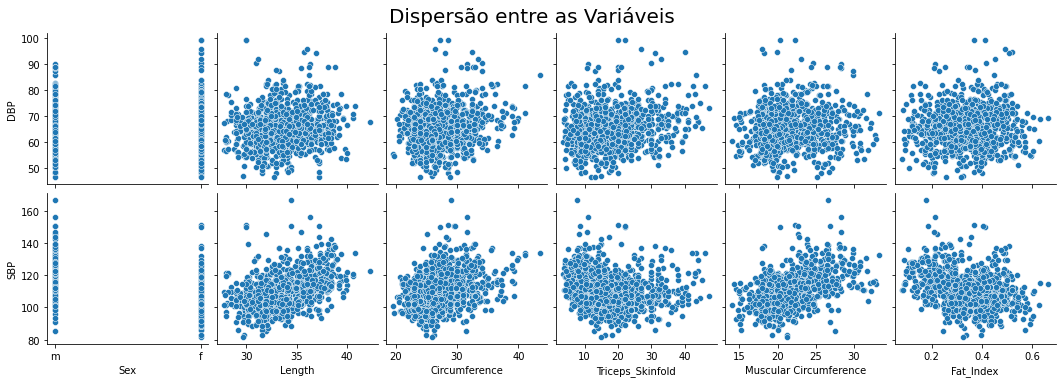

In [48]:
ax = sns.pairplot(data_dobrados, y_vars=['DBP', 'SBP'], x_vars=['Sex', 'Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

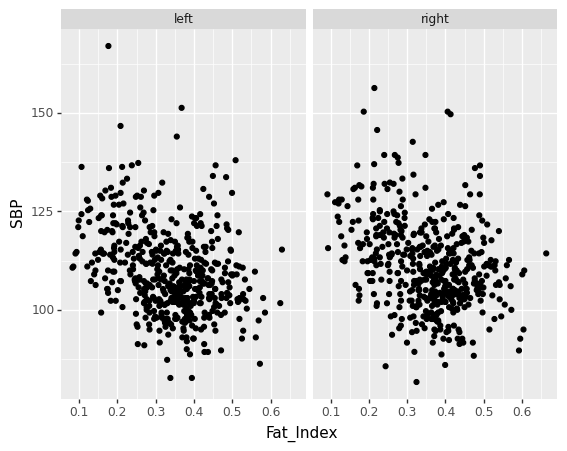

<ggplot: (8757944049653)>

In [49]:
(
    ggplot(data_dobrados, aes(x='Fat_Index', y='SBP')) + 
    geom_point() + 
    facet_grid(". ~ arm")
)

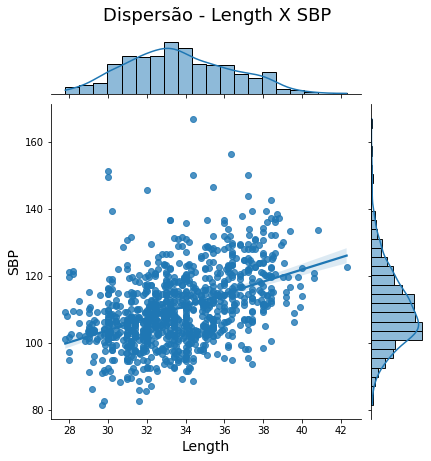

In [50]:
ax = sns.jointplot(x="Length", y="SBP", data=data_dobrados, kind='reg')
ax.fig.suptitle('Dispersão - Length X SBP ', fontsize=18, y=1.05)
ax.set_axis_labels("Length", "SBP", fontsize=14)
ax

## <font color='red' style='font-size: 22px;'> Modelo de Regressão Linear </font>
<hr style='border: 2px solid red;'>

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *

In [52]:
data_dobrados['arm'] = np.where(data_dobrados['arm'] == 'right', 1, 0)
data_dobrados['Sex'] = np.where(data_dobrados['Sex'] == 'f', 1, 0)

In [53]:
data_dobrados.head()

,id,Age,BMI,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP,arm,SBP_ob,arm_num,Sex_num
1,1,23,25.1,0,38.00,31.50,14.67,26.89,0.274764,61.33,109.33,1,111.30,1,0
2,1,23,25.1,0,36.50,30.83,17.67,25.29,0.327192,62.30,111.30,0,109.33,0,0
3,2,20,20.7,1,30.43,25.00,22.33,17.99,0.456393,60.30,101.70,0,100.67,0,1
4,2,20,20.7,1,28.83,25.33,22.33,18.32,0.449823,57.33,100.67,1,101.70,1,1
5,4,20,19.8,1,34.13,22.40,24.00,14.86,0.545678,58.67,98.33,1,94.70,1,1


In [54]:
data_dobrados = data_dobrados.sort_values(["arm", "id"])

In [55]:
{
    "Sem Circumference": 6916,
    "Sem Muscular Circumference": 6910,
    "Com braço": 6904
}


{'Sem Circumference': 6916,
 'Sem Muscular Circumference': 6910,
 'Com braço': 6904}

In [56]:
data_dobrados = data_dobrados.sort_values(["arm", "id"])
data_dobrados.columns = data_dobrados.columns.str.replace(" ", "_")

In [57]:
data_dobrados.columns

Index(['id', 'Age', 'BMI', 'Sex', 'Length', 'Circumference',
       'Triceps_Skinfold', 'Muscular_Circumference', 'Fat_Index', 'DBP', 'SBP',
       'arm', 'SBP_ob', 'arm_num', 'Sex_num'],
      dtype='object')

In [58]:
mod_e = smf.ols(formula='SBP ~  Circumference + Fat_Index + Length', 
                data=data_dobrados.query("arm_num == 0"))

mod_d = smf.ols(formula='SBP ~  Circumference + Fat_Index + Length', 
                data=data_dobrados.query("arm_num == 1"))

fitted_e = mod_e.fit()
fitted_d = mod_d.fit()

In [59]:
fitted_e.compare_lr_test(fitted_e)

(-0.0, nan, 0.0)

In [60]:
print(fitted_d.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     62.16
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           5.11e-34
Time:                        11:01:42   Log-Likelihood:                -1794.0
No. Observations:                 489   AIC:                             3596.
Df Residuals:                     485   BIC:                             3613.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        60.6667      7.003      8.663

In [61]:
print(fitted_e.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     76.22
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.10e-40
Time:                        11:01:42   Log-Likelihood:                -1767.9
No. Observations:                 489   AIC:                             3544.
Df Residuals:                     485   BIC:                             3561.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        56.1882      6.766      8.305

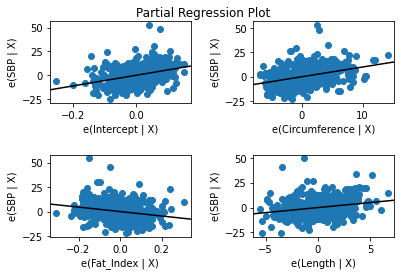

In [62]:
fig = sm.graphics.plot_partregress_grid(fitted_e)
fig.tight_layout(pad=2.0)

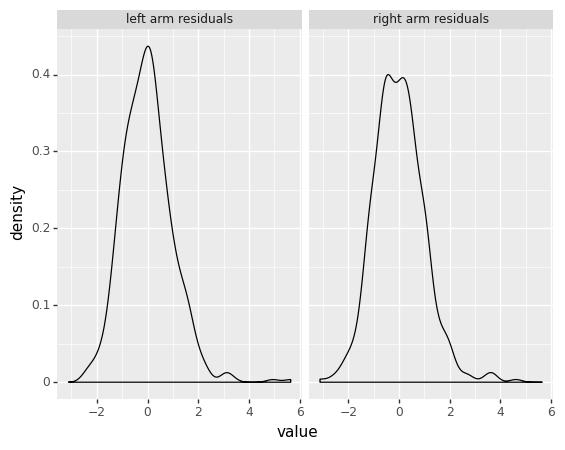

<ggplot: (8757944093213)>

In [63]:
res_e = fitted_e.resid_pearson
res_d = fitted_d.resid_pearson
data_dobrados['resid_mod'] = list(res_d) + list(res_e)
res_df = pd.DataFrame({"left arm residuals": res_e, 'right arm residuals': res_d})

(
    ggplot(res_df.melt(), aes(x='value')) + 
    geom_density() + 
    facet_grid(". ~ variable")
)

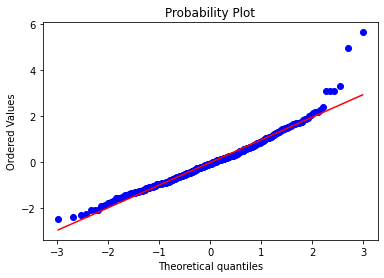

In [64]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res_e, dist="norm", plot=plt)

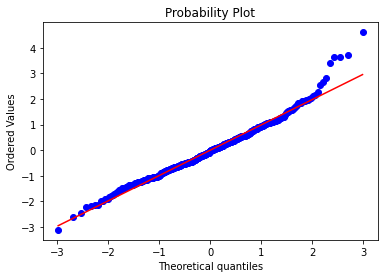

In [65]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res_d, dist="norm", plot=plt)

In [66]:
from scipy.stats import probplot
from scipy.stats import shapiro
def teste_normalAge_shapiro(data):
    for i in data.columns:
        w_test, p_valor = shapiro(data[[i]])
        if(p_valor <= 0.05):
            print(f" {i} - Distribuição NÃO normal com p-valor: {round(p_valor, 4)}") # Rejeita H0
        else:
            print(f" ************* {i} - Distribuição normal com p-valor: {round(p_valor, 4)}")
            
teste_normalAge_shapiro(res_df)

 left arm residuals - Distribuição NÃO normal com p-valor: 0.0
 right arm residuals - Distribuição NÃO normal com p-valor: 0.0


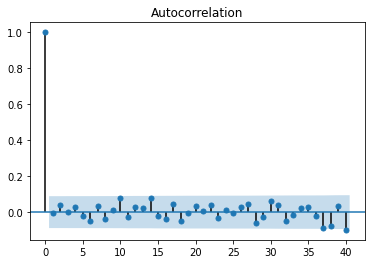

In [67]:
sm.graphics.tsa.plot_acf(res_e, lags=40)
plt.show()

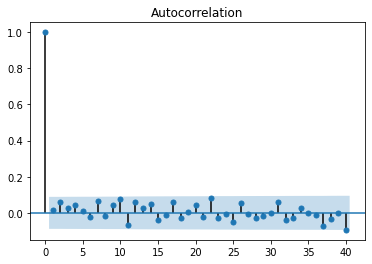

In [68]:
sm.graphics.tsa.plot_acf(res_d, lags=40)
plt.show()

## <font color='red' style='font-size: 22px;'> Modelo de Regressão Linear (SEX)</font>
<hr style='border: 2px solid red;'>


In [69]:
data_dobrados.groupby(['Sex'])['Fat_Index'].describe().reset_index()

,Sex,count,mean,std,min,25%,50%,75%,max
0,0,304.0,0.244945,0.095267,0.082571,0.183499,0.228893,0.280072,0.663243
1,1,674.0,0.393390,0.074138,0.209225,0.341802,0.387749,0.438797,0.625453


In [70]:
res_e = fitted_e.resid_pearson
res_d = fitted_d.resid_pearson
data_dobrados['resid_mod'] = list(res_d) + list(res_e)

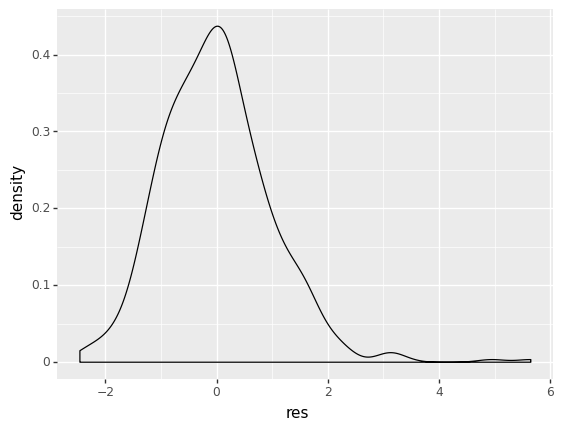

<ggplot: (8757947432613)>

In [71]:
res = res_e
res_df = pd.DataFrame({"res": res})

(
    ggplot(res_df, aes(x='res')) + 
    geom_density()
)

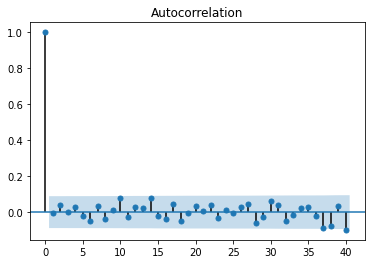

In [72]:
sm.graphics.tsa.plot_acf(res, lags=40)
plt.show()

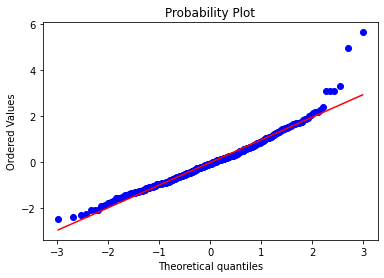

In [73]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res, dist="norm", plot=plt)

In [74]:
from scipy.stats import probplot
from scipy.stats import shapiro
def teste_normalAge_shapiro(data):
    for i in data.columns:
        w_test, p_valor = shapiro(data[[i]])
        if(p_valor <= 0.05):
            print(f" {i} - Distribuição NÃO normal com p-valor: {round(p_valor, 4)}") # Rejeita H0
        else:
            print(f" ************* {i} - Distribuição normal com p-valor: {round(p_valor, 4)}")
            
teste_normalAge_shapiro(res_df)

 res - Distribuição NÃO normal com p-valor: 0.0


In [75]:
data_dobrados = data_dobrados.sort_values("id")
data_dobrados['id'] = data_dobrados['id'].astype(str)
mod = smf.ols(formula='SBP ~ Fat_Index + Circumference + Length + arm + Sex', 
              data=data_dobrados)
fitted = mod.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     110.8
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.14e-92
Time:                        11:01:45   Log-Likelihood:                -3517.5
No. Observations:                 978   AIC:                             7047.
Df Residuals:                     972   BIC:                             7076.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        82.3826      5.283     15.593

Fixando um valor qualquer para o Length, Circumference e arm. Ao variar x unAges no Fat_Index o SBP, em média, diminuirá x*16.6886 unAges.

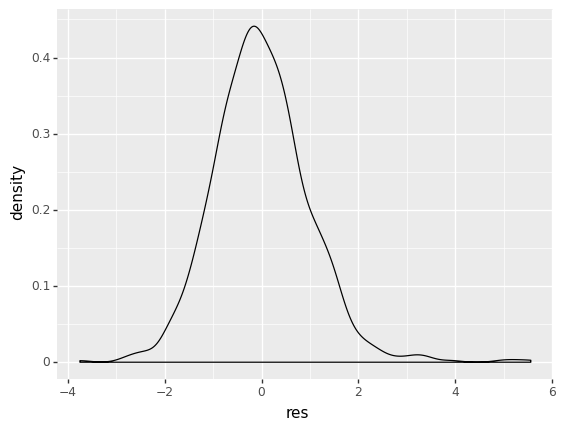

<ggplot: (8757944695457)>

In [76]:
res = fitted.resid_pearson
res_df = pd.DataFrame({"res": res})

(
    ggplot(res_df, aes(x='res')) + 
    geom_density()
)

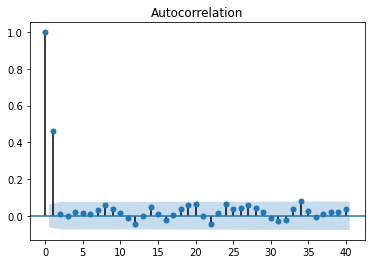

In [77]:
sm.graphics.tsa.plot_acf(res, lags=40)
plt.show()

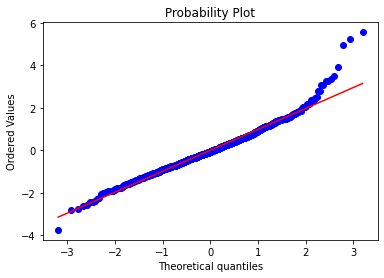

In [78]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

pl = probplot(res, dist="norm", plot=plt)

In [79]:
teste_normalAge_shapiro(res_df)

 res - Distribuição NÃO normal com p-valor: 0.0


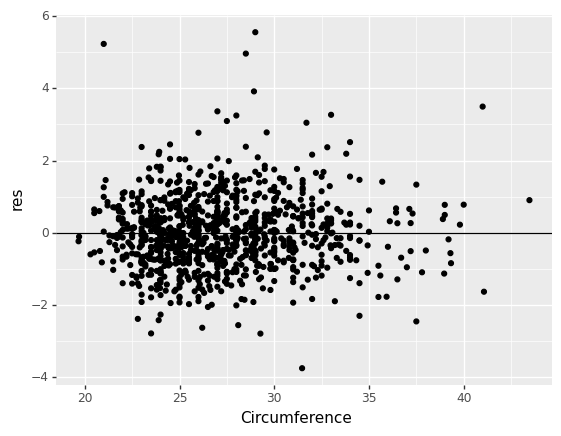

<ggplot: (8757943768085)>

In [80]:
res_df['Circumference'] = data_dobrados['Circumference']
res_df['Fat_Index'] = data_dobrados['Fat_Index']
res_df['Length'] = data_dobrados['Length']
res_df['arm'] = data_dobrados['arm']

(
    ggplot(res_df, aes(x="Circumference", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0)
)


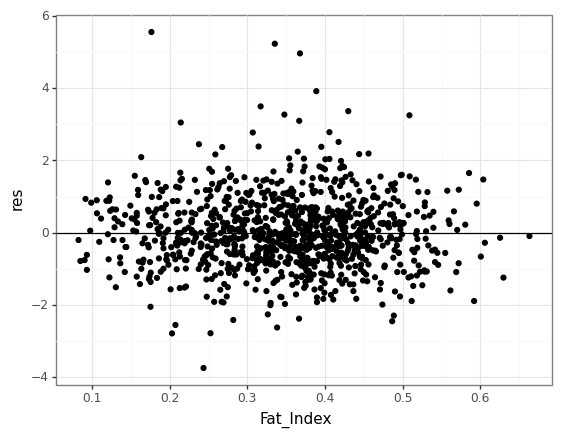

<ggplot: (8757943764121)>

In [81]:
(
    ggplot(res_df, aes(x="Fat_Index", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

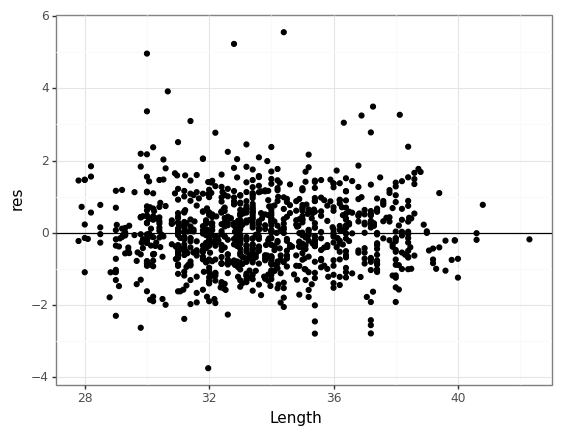

<ggplot: (8757943675133)>

In [82]:
(
    ggplot(res_df, aes(x="Length", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

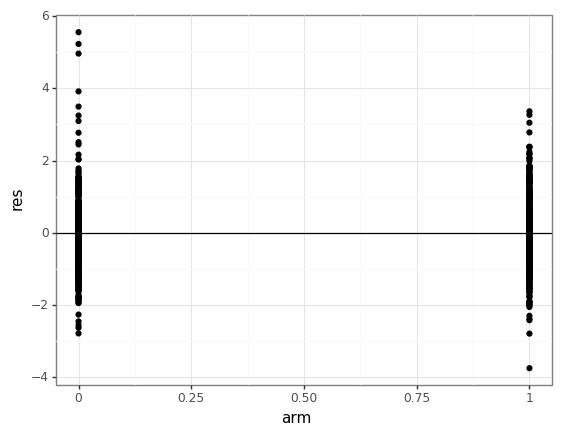

<ggplot: (8757943659053)>

In [83]:
(
    ggplot(res_df, aes(x="arm", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

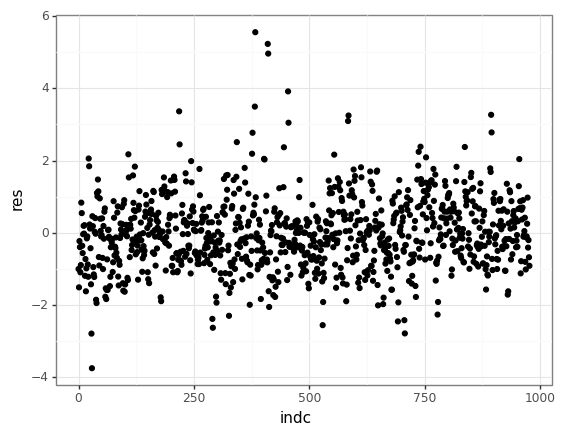

<ggplot: (8757943699237)>

In [84]:
res_df['indc'] = list(range(len(res_df))) 
(
    ggplot(res_df, aes(x="indc", y="res")) + 
    geom_point() + 
    theme_bw()
)

In [85]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res)

1.0695249774748763

O modelo normal é dado pela equação:

$$Y_i = \beta_0 + \mathbf{x}_i\boldsymbol{\beta} + e_i$$.

O modelo assume que o resíduo é normalmente distribuído $e_i \overset{idd}{\sim} N(0, \sigma^2)$. Ou seja, $e_i$ deve normal centrado 0, independênte e com variância $\sigma^2$ constante (homocedástico).

In [86]:
data_dobrados.columns.str.replace(" ", "_")

Index(['id', 'Age', 'BMI', 'Sex', 'Length', 'Circumference',
       'Triceps_Skinfold', 'Muscular_Circumference', 'Fat_Index', 'DBP', 'SBP',
       'arm', 'SBP_ob', 'arm_num', 'Sex_num', 'resid_mod'],
      dtype='object')

$$Y_{ij} = \beta_0 + \mathbf{x}_i\boldsymbol{\beta} + \delta_j+ e_i$$.


In [87]:
data_dobrados.head()

,id,Age,BMI,Sex,Length,Circumference,Triceps_Skinfold,Muscular_Circumference,Fat_Index,DBP,SBP,arm,SBP_ob,arm_num,Sex_num,resid_mod
2,1,23,25.1,0,36.50,30.83,17.67,25.29,0.327192,62.30,111.30,0,109.33,0,0,-1.250097
1,1,23,25.1,0,38.00,31.50,14.67,26.89,0.274764,61.33,109.33,1,111.30,1,0,-0.579585
3,2,20,20.7,1,30.43,25.00,22.33,17.99,0.456393,60.30,101.70,0,100.67,0,1,-0.152544
4,2,20,20.7,1,28.83,25.33,22.33,18.32,0.449823,57.33,100.67,1,101.70,1,1,0.010415
6,4,20,19.8,1,33.00,22.80,23.67,15.37,0.528555,59.30,94.70,0,98.33,0,1,-0.519625


In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_f = data_dobrados.copy()
data_f.columns = data_f.columns.str.replace(" ", "_")

md = smf.mixedlm("SBP ~ Fat_Index + Circumference + Length + Sex + arm", data_f, groups=data_f["arm"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: SBP       
No. Observations:   978     Method:             REML      
No. Groups:         2       Scale:              78.3794   
Min. group size:    489     Log-Likelihood:     -3517.5063
Max. group size:    489     Converged:          Yes       
Mean group size:    489.0                                 
----------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept     82.383   10.310  7.991 0.000  62.176 102.590
Fat_Index      0.881    3.894  0.226 0.821  -6.750   8.513
Circumference  0.468    0.090  5.194 0.000   0.292   0.645
Length         0.631    0.133  4.754 0.000   0.371   0.892
Sex           -9.993    1.023 -9.767 0.000 -11.998  -7.987
arm            1.312   12.533  0.105 0.917 -23.253  25.877
Group Var     78.379                                      



In [89]:
res = mdf.resid
res_df = pd.DataFrame()
res_df['res'] = res

In [90]:
durbin_watson(res)

1.0695249774748758

In [91]:
teste_normalAge_shapiro(res_df)

 res - Distribuição NÃO normal com p-valor: 0.0


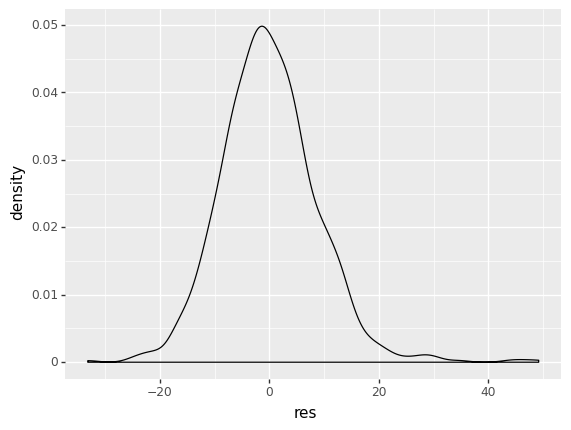

<ggplot: (8757943530949)>

In [92]:
(
    ggplot(res_df, aes(x='res')) + 
    geom_density()
)

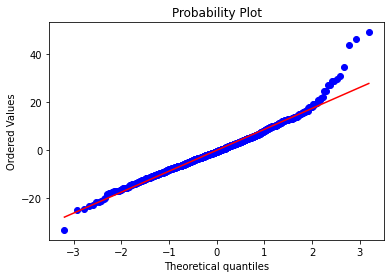

In [93]:
pl = probplot(res, dist="norm", plot=plt)

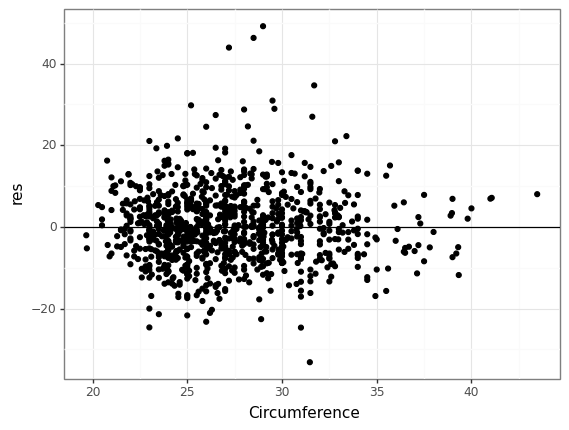

<ggplot: (8757943602181)>

In [94]:
res_df['Circumference'] = data_dobrados['Circumference']
res_df['Fat_Index'] = data_dobrados['Fat_Index']
res_df['Length'] = data_dobrados['Length']
res_df['arm'] = data_dobrados['arm']

(
    ggplot(res_df, aes(x="Circumference", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

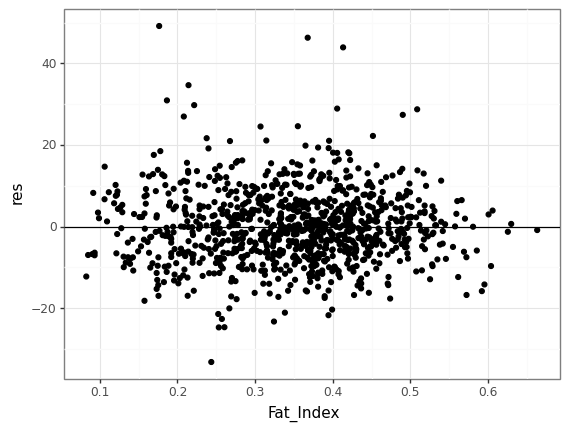

<ggplot: (8757944579261)>

In [95]:
(
    ggplot(res_df, aes(x="Fat_Index", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

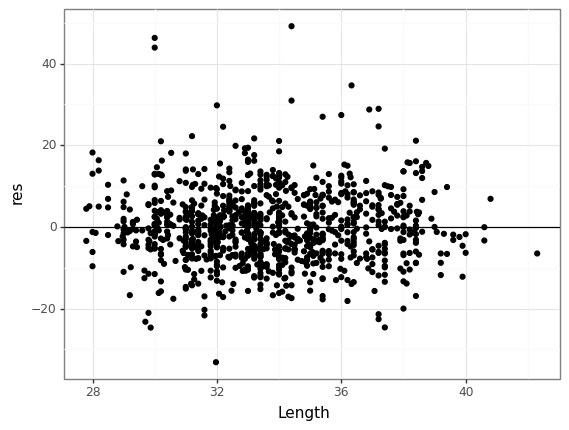

<ggplot: (8757944663621)>

In [96]:
(
    ggplot(res_df, aes(x="Length", y="res")) + 
    geom_point() + 
    geom_hline(yintercept = 0) + 
    theme_bw()
)

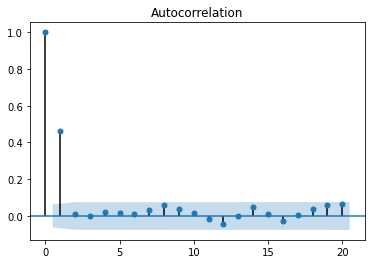

In [97]:
sm.graphics.tsa.plot_acf(mdf.resid, lags=20)
plt.show()

## Regressão para as faixas 

In [98]:
data_e = data_dobrados.query("arm == 0")
data_d = data_dobrados.query("arm == 1")

In [99]:
data_e.columns

Index(['id', 'Age', 'BMI', 'Sex', 'Length', 'Circumference',
       'Triceps_Skinfold', 'Muscular_Circumference', 'Fat_Index', 'DBP', 'SBP',
       'arm', 'SBP_ob', 'arm_num', 'Sex_num', 'resid_mod'],
      dtype='object')

In [100]:
inters = [
          [22.87, 24.46],
          [24.46, 26.05],
          [26.05, 27.63],
          [27.63, 29.22],
          [29.22, 30.81]
]

In [101]:
bd_inter = pd.DataFrame()
for inter, cod in zip(inters, list(range(0, len(inters)))):
  bd = data_e.query(f"Circumference > {inter[0]} & Circumference <= {inter[1]}").copy()
  bd['interval'] = cod 
  bd_inter = bd_inter.append(bd)

bd_inter['interval'] = pd.Categorical(bd_inter['interval'])

In [102]:
mod_inter_e = smf.ols(formula='SBP ~  interval*Fat_Index + Length ', data=bd_inter)
fitted_inter_e = mod_inter_e.fit()
print(fitted_inter_e.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     14.45
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.75e-21
Time:                        11:02:16   Log-Likelihood:                -1304.1
No. Observations:                 360   AIC:                             2630.
Df Residuals:                     349   BIC:                             2673.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 